This notebook takes the first steps in applying the calibration workflow to multiple mzML files on the PXD001468 and PXD032235 datasets. Dictionaries to stores the data from the multiple mzML files are constructed (ref. mzMLtoDF.py) and saved as pickle files to save time. To automate the calibration to all the mzMl files, the "LRcal.py" and "RFcal.py" scripts were written.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

PXD001468 = "results/sage/FULL_PXD001468.tsv"
df_uncal_results = pd.read_csv(PXD001468, sep='\t')
print("Lineair data uncalibrated CS:                     ", df_uncal_results.shape)
df_uncal_results_q = df_uncal_results[df_uncal_results["spectrum_q"] < 0.01]
print("Lineair data uncalibrated CS q:                   ", df_uncal_results_q.shape)

PXD032235 = "results/sage/FULL_PXD032235.tsv"
df_uncal_results_nonlin = pd.read_csv(PXD032235, sep='\t')
print("Lineair data uncalibrated CS:                     ", df_uncal_results_nonlin.shape)
df_uncal_results_nonlin_q = df_uncal_results_nonlin[df_uncal_results_nonlin["spectrum_q"] < 0.01]
print("Lineair data uncalibrated CS q:                   ", df_uncal_results_nonlin_q.shape)

Lineair data uncalibrated CS:                      (779484, 36)
Lineair data uncalibrated CS q:                    (418179, 36)
Lineair data uncalibrated CS:                      (646189, 36)
Lineair data uncalibrated CS q:                    (535853, 36)


In [2]:
df_uncal_results_q_copy = df_uncal_results_q.copy()
df_uncal_results_q = df_uncal_results_q[['filename', 'scannr', 'peptide']]

df_uncal_results_nonlin_q_copy = df_uncal_results_nonlin_q.copy()
df_uncal_results_nonlin_q = df_uncal_results_nonlin_q[['filename', 'scannr', 'peptide']]

In [4]:
'''
import os
from pyteomics import mzml

folder_path = "results/TRFP/PXD001468"
spectra_by_file = {}

for file_name in os.listdir(folder_path):
    if file_name.endswith('.mzML'):
        file_path = os.path.join(folder_path, file_name)
        
        # Initialize lists for spectra and counters for each file
        spectra_list = []
        
        # Open the mzML file for reading
        with mzml.read(file_path) as reader:
            # Iterate over each spectrum in the mzML file
            for spectrum in reader:
                # Append the spectrum to the list
                spectra_list.append(spectrum)
        
        # Store spectra list and counter in dictionary
        spectra_by_file[file_name] = spectra_list
        
        print(f"File: {file_name}, Total spectra read: {len(spectra_list)}")
    '''

'\nimport os\nfrom pyteomics import mzml\n\nfolder_path = "results/TRFP/PXD001468"\nspectra_by_file = {}\n\nfor file_name in os.listdir(folder_path):\n    if file_name.endswith(\'.mzML\'):\n        file_path = os.path.join(folder_path, file_name)\n        \n        # Initialize lists for spectra and counters for each file\n        spectra_list = []\n        \n        # Open the mzML file for reading\n        with mzml.read(file_path) as reader:\n            # Iterate over each spectrum in the mzML file\n            for spectrum in reader:\n                # Append the spectrum to the list\n                spectra_list.append(spectrum)\n        \n        # Store spectra list and counter in dictionary\n        spectra_by_file[file_name] = spectra_list\n        \n        print(f"File: {file_name}, Total spectra read: {len(spectra_list)}")\n    '

In [5]:
'''
import pickle

# Save the dictionary to a file
with open("spectra_by_file.pkl", "wb") as f:
    pickle.dump(spectra_by_file, f)
'''

'\nimport pickle\n\n# Save the dictionary to a file\nwith open("spectra_by_file.pkl", "wb") as f:\n    pickle.dump(spectra_by_file, f)\n'

In [3]:
import pickle

# Load the dictionary from the saved file
with open("spectra_by_file.pkl", "rb") as f:
    spectra_by_file = pickle.load(f)

# Now, spectra_by_file contains the dictionary loaded from the file

In [4]:
spectra_by_file.keys()

dict_keys(['b1948_293T_proteinID_12B_QE3_122212.mzML', 'b1932_293T_proteinID_12A_QE3_122212.mzML', 'b1927_293T_proteinID_07A_QE3_122212.mzML', 'b1923_293T_proteinID_03A_QE3_122212.mzML', 'b1925_293T_proteinID_05A_QE3_122212.mzML', 'b1926_293T_proteinID_06A_QE3_122212.mzML', 'b1938_293T_proteinID_02B_QE3_122212.mzML', 'b1946_293T_proteinID_10B_QE3_122212.mzML', 'b1940_293T_proteinID_04B_QE3_122212.mzML', 'b1942_293T_proteinID_06B_QE3_122212.mzML', 'b1945_293T_proteinID_09B_QE3_122212.mzML', 'b1939_293T_proteinID_03B_QE3_122212.mzML', 'b1929_293T_proteinID_09A_QE3_122212.mzML', 'b1944_293T_proteinID_08B_QE3_122212.mzML', 'b1924_293T_proteinID_04A_QE3_122212.mzML', 'b1906_293T_proteinID_01A_QE3_122212.mzML', 'b1922_293T_proteinID_02A_QE3_122212.mzML', 'b1937_293T_proteinID_01B_QE3_122212.mzML', 'b1931_293T_proteinID_11A_QE3_122212.mzML', 'b1943_293T_proteinID_07B_QE3_122212.mzML', 'b1928_293T_proteinID_08A_QE3_122212.mzML', 'b1947_293T_proteinID_11B_QE3_122212.mzML', 'b1930_293T_proteinID

In [9]:
'''
import os
from pyteomics import mzml

folder_path = "results/TRFP/PXD032235"
spectra_by_file_nonlin = {}

for file_name in os.listdir(folder_path):
    if file_name.endswith('.mzML'):
        file_path = os.path.join(folder_path, file_name)
        
        # Initialize lists for spectra and counters for each file
        spectra_list_nonlin = []
        
        # Open the mzML file for reading
        with mzml.read(file_path) as reader:
            # Iterate over each spectrum in the mzML file
            for spectrum in reader:
                # Append the spectrum to the list
                spectra_list_nonlin.append(spectrum)
        
        # Store spectra list and counter in dictionary
        spectra_by_file_nonlin[file_name] = spectra_list_nonlin
        
        print(f"File: {file_name}, Total spectra read: {len(spectra_list_nonlin)}")
'''

'\nimport os\nfrom pyteomics import mzml\n\nfolder_path = "results/TRFP/PXD032235"\nspectra_by_file_nonlin = {}\n\nfor file_name in os.listdir(folder_path):\n    if file_name.endswith(\'.mzML\'):\n        file_path = os.path.join(folder_path, file_name)\n        \n        # Initialize lists for spectra and counters for each file\n        spectra_list_nonlin = []\n        \n        # Open the mzML file for reading\n        with mzml.read(file_path) as reader:\n            # Iterate over each spectrum in the mzML file\n            for spectrum in reader:\n                # Append the spectrum to the list\n                spectra_list_nonlin.append(spectrum)\n        \n        # Store spectra list and counter in dictionary\n        spectra_by_file_nonlin[file_name] = spectra_list_nonlin\n        \n        print(f"File: {file_name}, Total spectra read: {len(spectra_list_nonlin)}")\n'

In [10]:
'''
import pickle

# Save the dictionary to a file
with open("spectra_by_file_nonlin.pkl", "wb") as f:
    pickle.dump(spectra_by_file_nonlin, f)
'''

'\nimport pickle\n\n# Save the dictionary to a file\nwith open("spectra_by_file_nonlin.pkl", "wb") as f:\n    pickle.dump(spectra_by_file_nonlin, f)\n'

In [5]:
import pickle

# Load the dictionary from the saved file
with open("spectra_by_file_nonlin.pkl", "rb") as f:
    spectra_by_file_nonlin = pickle.load(f)

# Now, spectra_by_file_nonlin contains the dictionary loaded from the file

In [6]:
from pyteomics import mass

modification_dict = {
    '[+15.9949]': 'ox',
    '[+57.0214]': 'cm'
}
print(modification_dict)

db = mass.Unimod()
aa_comp = dict(mass.std_aa_comp)
aa_comp['ox'] = db.by_title('Oxidation')['composition']
aa_comp['cm'] = db.by_title('Carbamidomethyl')['composition']
print(aa_comp)

{'[+15.9949]': 'ox', '[+57.0214]': 'cm'}
{'A': Composition({'H': 5, 'C': 3, 'O': 1, 'N': 1}), 'C': Composition({'H': 5, 'C': 3, 'S': 1, 'O': 1, 'N': 1}), 'D': Composition({'H': 5, 'C': 4, 'O': 3, 'N': 1}), 'E': Composition({'H': 7, 'C': 5, 'O': 3, 'N': 1}), 'F': Composition({'H': 9, 'C': 9, 'O': 1, 'N': 1}), 'G': Composition({'H': 3, 'C': 2, 'O': 1, 'N': 1}), 'H': Composition({'H': 7, 'C': 6, 'N': 3, 'O': 1}), 'I': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'J': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'K': Composition({'H': 12, 'C': 6, 'N': 2, 'O': 1}), 'L': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'M': Composition({'H': 9, 'C': 5, 'S': 1, 'O': 1, 'N': 1}), 'N': Composition({'H': 6, 'C': 4, 'O': 2, 'N': 2}), 'P': Composition({'H': 7, 'C': 5, 'O': 1, 'N': 1}), 'Q': Composition({'H': 8, 'C': 5, 'O': 2, 'N': 2}), 'R': Composition({'H': 12, 'C': 6, 'N': 4, 'O': 1}), 'S': Composition({'H': 5, 'C': 3, 'O': 2, 'N': 1}), 'T': Composition({'H': 7, 'C': 4, 'O': 2, 'N': 1}), '

In [7]:
def extract_features_uncal(row):
    file = row['filename']
    
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    
    spectrum = spectra_by_file[file][index_in_mzml]
    
    # Check if 'precursorList' is present in the spectrum dictionary
    if 'precursorList' in spectrum:
        charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    else:
        charge = 0
        
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
        
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT




def extract_features_uncal_nonlin(row):
    file = row['filename']
    
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    
    spectrum = spectra_by_file_nonlin[file][index_in_mzml]
    
    # Check if 'precursorList' is present in the spectrum dictionary
    if 'precursorList' in spectrum:
        charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    else:
        charge = 0
        
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
       
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT

In [8]:
df_uncal_results_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_q.apply(extract_features_uncal, axis=1, result_type='expand')
df_uncal_features = df_uncal_results_q[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]

df_uncal_results_nonlin_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_nonlin_q.apply(extract_features_uncal_nonlin, axis=1, result_type='expand')
df_uncal_features_nonlin = df_uncal_results_nonlin_q[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]

In [9]:
df_uncal_results_q.head(5)

filename  \
0  b1942_293T_proteinID_06B_QE3_122212.mzML   
1  b1926_293T_proteinID_06A_QE3_122212.mzML   
2  b1944_293T_proteinID_08B_QE3_122212.mzML   
3  b1939_293T_proteinID_03B_QE3_122212.mzML   
4  b1939_293T_proteinID_03B_QE3_122212.mzML   

                                           scannr  \
0   controllerType=0 controllerNumber=1 scan=5204   
1  controllerType=0 controllerNumber=1 scan=48847   
2  controllerType=0 controllerNumber=1 scan=37185   
3  controllerType=0 controllerNumber=1 scan=28573   
4  controllerType=0 controllerNumber=1 scan=28860   

                                   peptide        expMZ       calcMZ  \
0                  GGSGGSYGGGGSGGGYGGGSGSR   896.370422   896.367492   
1  EC[+57.0214]PSDEC[+57.0214]GAGVFMASHFDR  1086.435303  1086.432606   
2   LSHEDDHILEDAGSSDISSDAAC[+57.0214]TNPNK   750.323242   750.329627   
3                          KAEAGAGSATEFQFR   785.388306   785.386436   
4                          KAEAGAGSATEFQFR   785.388428   785.386436   

    deltaMZ          RT         TIC      IT  
0  0.002931   33.789670   8016089.0  60.000  
1  0.002697  150.658530  14618531.0  60.000  
2 -0.006385  105.330660  17462954.0  60.000  
3  0.001869   94.762298  68873648.0   8.418  
4  0.001991   95.448062  10911043.0  60.000

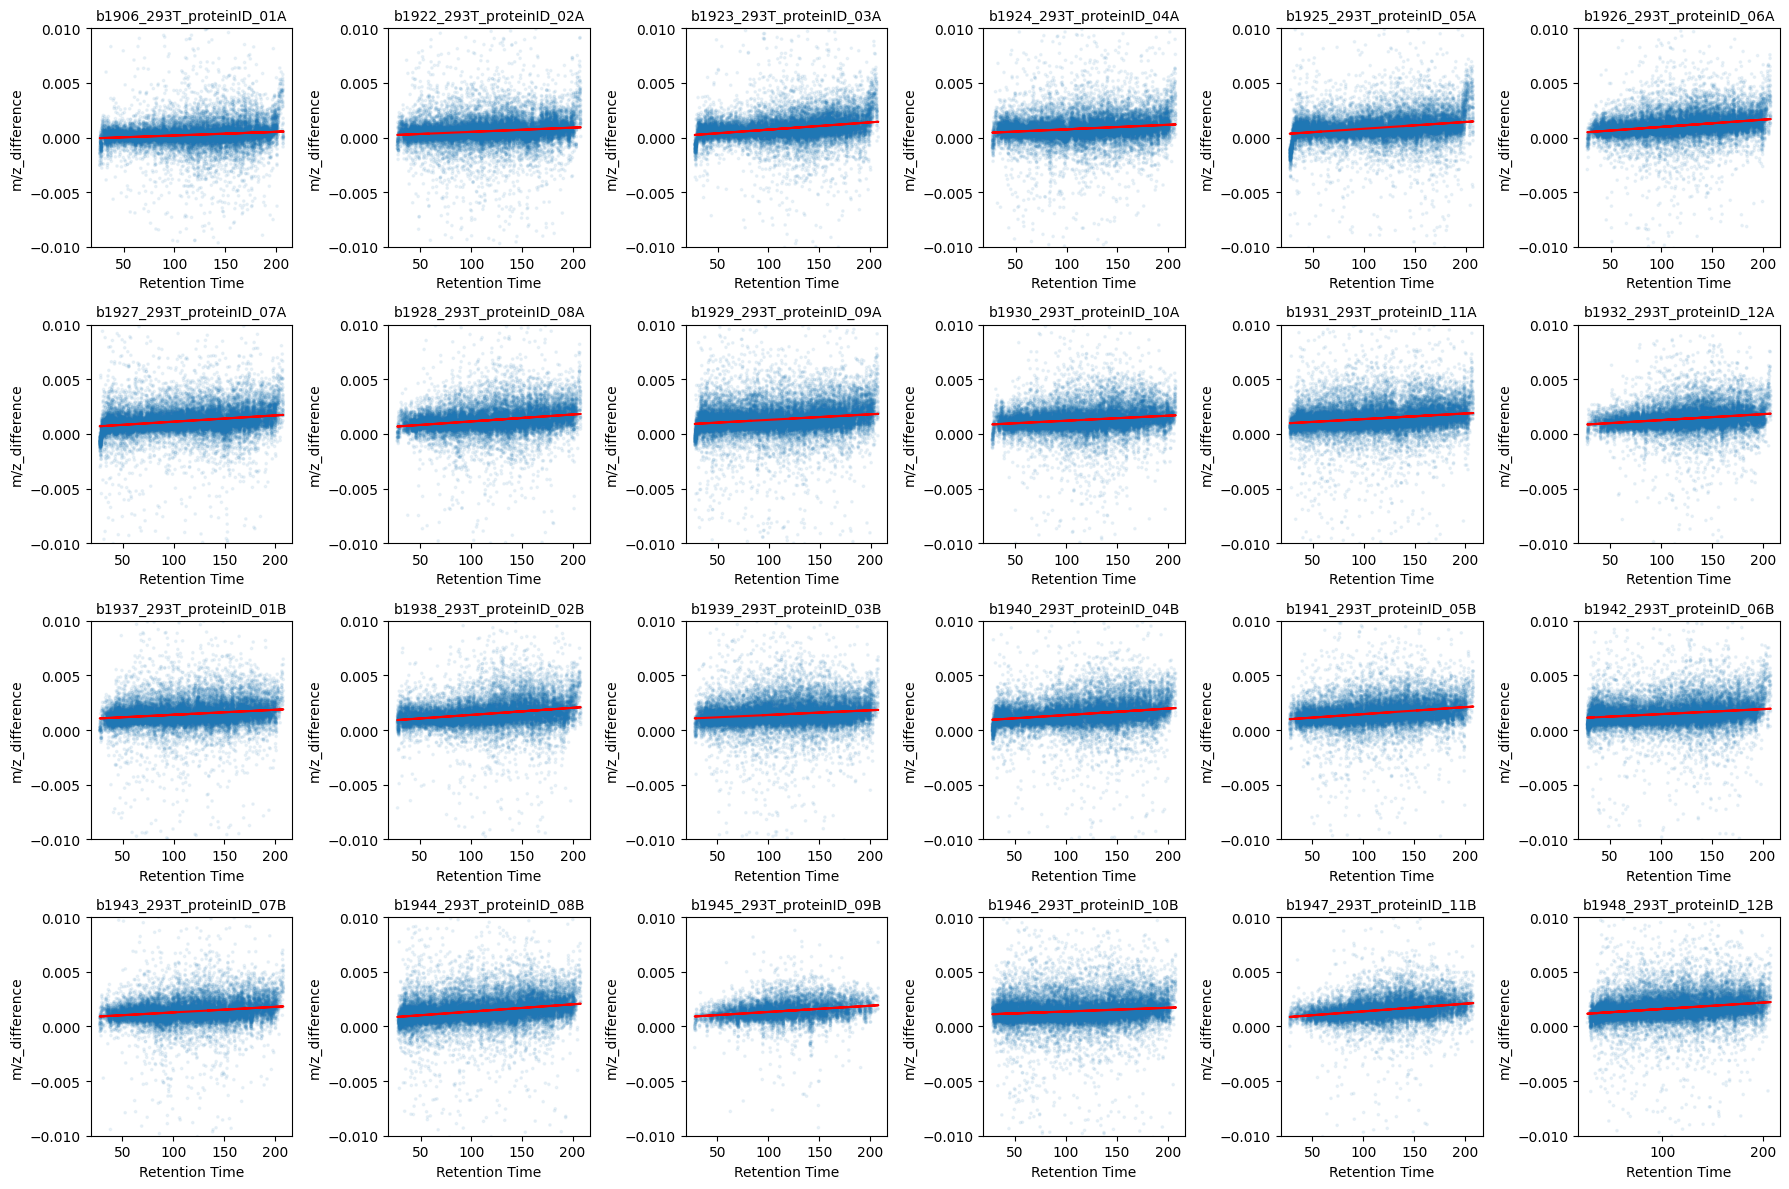

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get unique filenames and sort alphabetically
unique_filenames = np.sort(df_uncal_results_q['filename'].unique())

# Calculate number of rows and columns for subplots
num_plots = len(unique_filenames)
num_cols = 6
num_rows = int(np.ceil(num_plots / num_cols))

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axis array for easy indexing
axs = axs.flatten()

# Loop through unique filenames and plot
for i, filename in enumerate(unique_filenames):
    df_subset = df_uncal_results_q[df_uncal_results_q['filename'] == filename]
    
    # Extract the part of the filename before "_QE3..."
    title = filename.split('_QE3')[0]
    
    axs[i].scatter(df_subset['RT'], df_subset['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3)
    x = df_subset['RT']
    y = df_subset['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i].plot(x, polynomial(x), color='red')
    
    axs[i].set_xlabel('Retention Time')
    axs[i].set_ylabel('m/z_difference')
    axs[i].set_title(f'{title}', fontsize=10)
    axs[i].set_ylim(-0.01, 0.01)
    
    # Print coefficients
    slope, intercept = coefficients
    
    # Add coefficients to dataframe with increased precision
    df_uncal_results_q.loc[df_uncal_results_q['filename'] == filename, 'slope'] = "{:.30f}".format(slope)
    df_uncal_results_q.loc[df_uncal_results_q['filename'] == filename, 'intercept'] = "{:.30f}".format(intercept)

# Hide any unused subplots
for i in range(num_plots, num_cols*num_rows):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
df_uncal_results_q.head(20)

filename  \
0   b1942_293T_proteinID_06B_QE3_122212.mzML   
1   b1926_293T_proteinID_06A_QE3_122212.mzML   
2   b1944_293T_proteinID_08B_QE3_122212.mzML   
3   b1939_293T_proteinID_03B_QE3_122212.mzML   
4   b1939_293T_proteinID_03B_QE3_122212.mzML   
5   b1922_293T_proteinID_02A_QE3_122212.mzML   
6   b1927_293T_proteinID_07A_QE3_122212.mzML   
7   b1927_293T_proteinID_07A_QE3_122212.mzML   
8   b1924_293T_proteinID_04A_QE3_122212.mzML   
9   b1922_293T_proteinID_02A_QE3_122212.mzML   
10  b1927_293T_proteinID_07A_QE3_122212.mzML   
11  b1944_293T_proteinID_08B_QE3_122212.mzML   
12  b1930_293T_proteinID_10A_QE3_122212.mzML   
13  b1943_293T_proteinID_07B_QE3_122212.mzML   
14  b1943_293T_proteinID_07B_QE3_122212.mzML   
15  b1946_293T_proteinID_10B_QE3_122212.mzML   
16  b1948_293T_proteinID_12B_QE3_122212.mzML   
17  b1927_293T_proteinID_07A_QE3_122212.mzML   
18  b1925_293T_proteinID_05A_QE3_122212.mzML   
19  b1925_293T_proteinID_05A_QE3_122212.mzML   

                                            scannr  \
0    controllerType=0 controllerNumber=1 scan=5204   
1   controllerType=0 controllerNumber=1 scan=48847   
2   controllerType=0 controllerNumber=1 scan=37185   
3   controllerType=0 controllerNumber=1 scan=28573   
4   controllerType=0 controllerNumber=1 scan=28860   
5   controllerType=0 controllerNumber=1 scan=28895   
6    controllerType=0 controllerNumber=1 scan=5705   
7   controllerType=0 controllerNumber=1 scan=54593   
8   controllerType=0 controllerNumber=1 scan=27758   
9   controllerType=0 controllerNumber=1 scan=29163   
10  controllerType=0 controllerNumber=1 scan=44156   
11  controllerType=0 controllerNumber=1 scan=51754   
12  controllerType=0 controllerNumber=1 scan=35879   
13  controllerType=0 controllerNumber=1 scan=40560   
14  controllerType=0 controllerNumber=1 scan=47240   
15   controllerType=0 controllerNumber=1 scan=5322   
16   controllerType=0 controllerNumber=1 scan=5159   
17  controllerType=0 controllerNumber=1 scan=54670   
18  controllerType=0 controllerNumber=1 scan=46961   
19  controllerType=0 controllerNumber=1 scan=67381   

                                      peptide        expMZ       calcMZ  \
0                     GGSGGSYGGGGSGGGYGGGSGSR   896.370422   896.367492   
1     EC[+57.0214]PSDEC[+57.0214]GAGVFMASHFDR  1086.435303  1086.432606   
2      LSHEDDHILEDAGSSDISSDAAC[+57.0214]TNPNK   750.323242   750.329627   
3                             KAEAGAGSATEFQFR   785.388306   785.386436   
4                             KAEAGAGSATEFQFR   785.388428   785.386436   
5                             KAEAGAGSATEFQFR   785.387878   785.386436   
6                          NQGGYGGSSSSSSYGSGR   847.855164   847.853686   
7                        GGVSAVAGGVTAVGSAVVNK   850.471252   850.470500   
8                             KAEAGAGSATEFQFR   785.386414   785.386436   
9                             KAEAGAGSATEFQFR   785.386963   785.386436   
10                       ATDAMAHVAGFTVAHDVSAR   676.331500   676.330296   
11         VPGAGTAPKPVSVAC[+57.0214]TQLAFSGPK   780.752900   780.750860   
12  SGC[+57.0214]AASHFAVQEC[+57.0214]MAQHQDWR   826.017700   826.016165   
13   REC[+57.0214]PSDEC[+57.0214]GAGVFMASHFDR   776.659500   776.657867   
14                    GVVPLAGTNGETTTQGLDGLSER  1136.577000  1136.574411   
15                         NQGGYGGSSSSSSYGSGR   847.856079   847.853686   
16                         NQGGYGGSSSSSSYGSGR   847.855225   847.853686   
17                           RGFAFVTFDDHDSVDK   928.434937   928.434115   
18                        GWLSLHTGNLDGEDHAAER   693.329200   693.327720   
19                    RVEDEVNSGVGQDGSLLSSPFLK   811.748500   811.746721   

     deltaMZ          RT          TIC      IT  \
0   0.002931   33.789670    8016089.0  60.000   
1   0.002697  150.658530   14618531.0  60.000   
2  -0.006385  105.330660   17462954.0  60.000   
3   0.001869   94.762298   68873648.0   8.418   
4   0.001991   95.448062   10911043.0  60.000   
5   0.001442   97.6301

In [12]:
# Loop through unique filenames to compute LR adjusted deltaMZ
for filename in df_uncal_results_q['filename'].unique():
    # Filter dataframe for the current filename
    df_subset = df_uncal_results_q[df_uncal_results_q['filename'] == filename]
    
    # Fit a line
    x = df_subset['RT']
    y = df_subset['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients
    
    # Subtract LR 'predicted' deltaMZ from deltaMZ to compute LR adjusted deltaMZ
    df_uncal_results_q.loc[df_uncal_results_q['filename'] == filename, 'LR adj deltaMZ'] = \
        df_subset['deltaMZ'] - (df_subset['RT'] * slope + intercept)

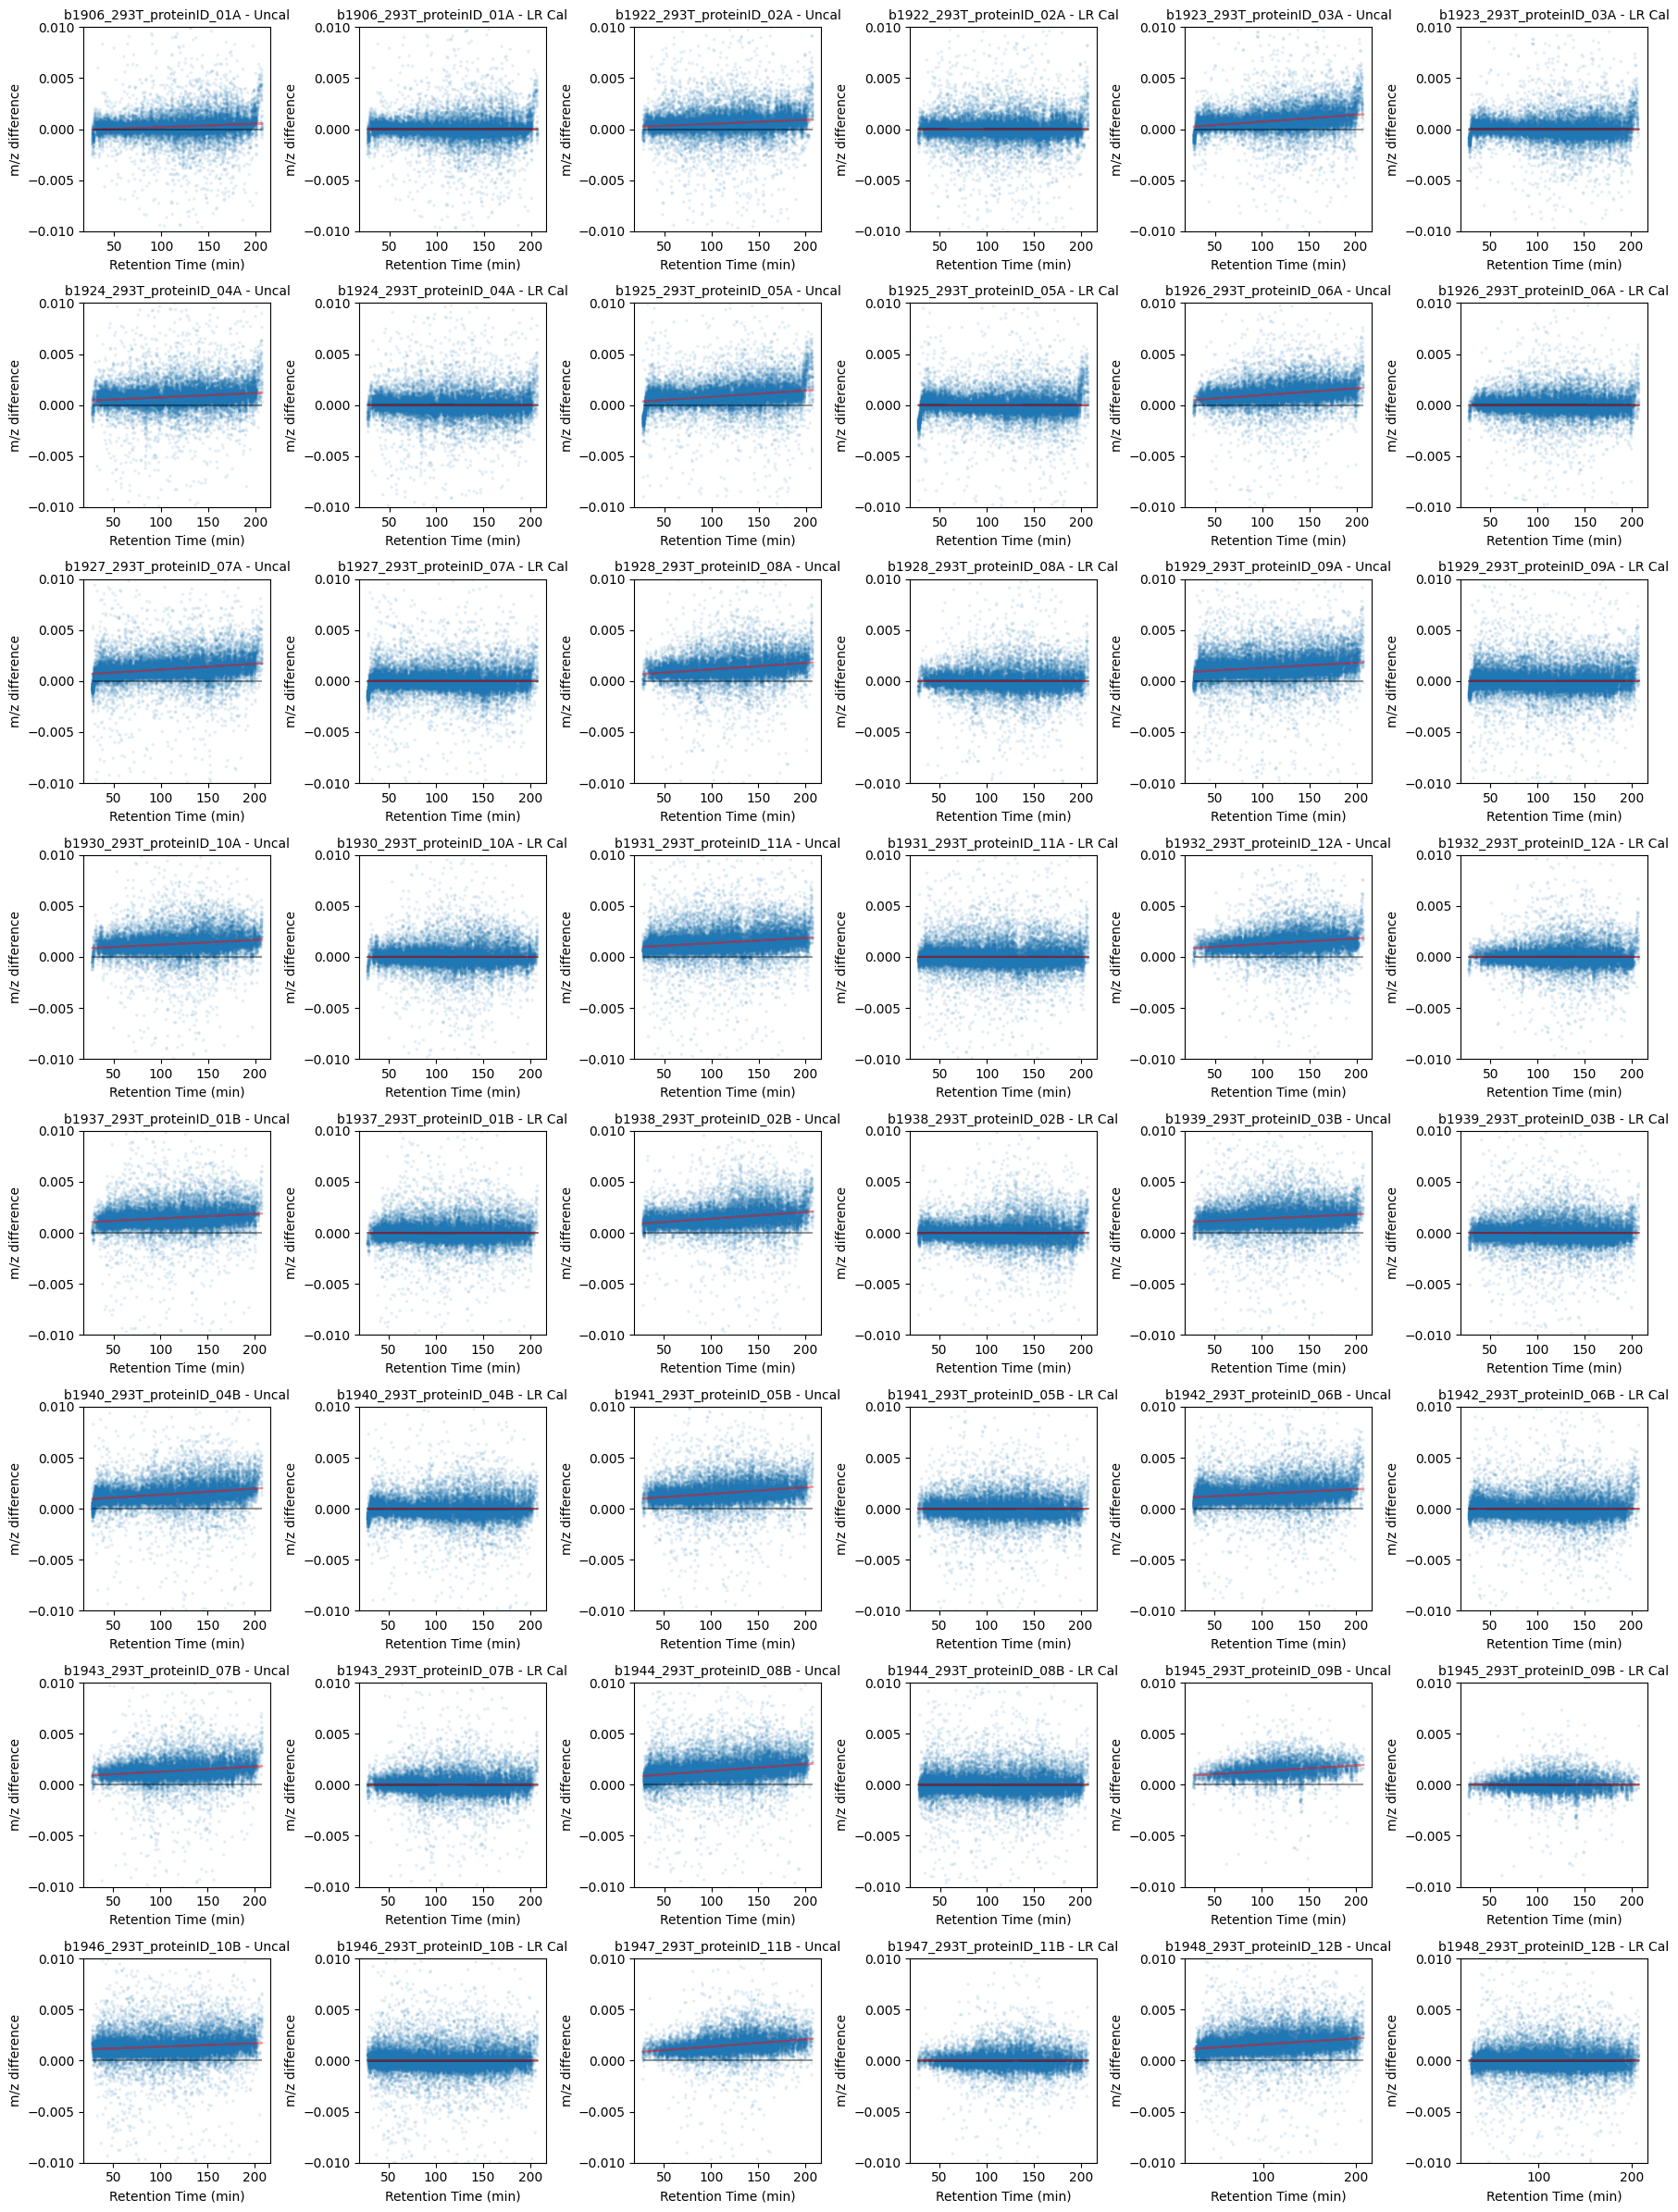

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get unique filenames and sort alphabetically
unique_filenames = np.sort(df_uncal_results_q['filename'].unique())

# Calculate number of rows and columns for subplots
num_plots = len(unique_filenames) * 2  # 2 subplots per filename
num_cols = 6
num_rows = int(np.ceil(num_plots / num_cols))

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 24))

# Flatten axis array for easy indexing
axs = axs.flatten()

# Loop through unique filenames and plot
for i, filename in enumerate(unique_filenames):
    # Filter dataframe for the current filename
    df_subset = df_uncal_results_q[df_uncal_results_q['filename'] == filename]
    
    # Extract the part of the filename before "_QE3..."
    title = filename.split('_QE3')[0]
    
    # First subplot (Uncalibrated)
    axs[i*2].scatter(df_subset['RT'], df_subset['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3)
    x = df_subset['RT']
    y = df_subset['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*2].plot(x, polynomial(x), color='red', alpha=0.4)
    x_range = df_subset['RT']
    axs[i*2].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)
    axs[i*2].set_ylim(-0.01, 0.01)
    axs[i*2].set_xlabel('Retention Time (min)')
    axs[i*2].set_ylabel('m/z difference')
    axs[i*2].set_title(f'{title} - Uncal', size = 10)

    # Second subplot (LR Calibrated)
    axs[i*2+1].scatter(df_subset['RT'], df_subset['LR adj deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3)
    x = df_subset['RT']
    y = df_subset['LR adj deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*2+1].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*2+1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*2+1].set_ylim(-0.01, 0.01)
    axs[i*2+1].set_xlabel('Retention Time (min)')
    axs[i*2+1].set_ylabel('m/z difference')
    axs[i*2+1].set_title(f'{title} - LR Cal', size = 10)

# Hide any unused subplots
for i in range(num_plots, num_cols*num_rows):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
df_uncal_results_q.head(5)

filename  \
0  b1942_293T_proteinID_06B_QE3_122212.mzML   
1  b1926_293T_proteinID_06A_QE3_122212.mzML   
2  b1944_293T_proteinID_08B_QE3_122212.mzML   
3  b1939_293T_proteinID_03B_QE3_122212.mzML   
4  b1939_293T_proteinID_03B_QE3_122212.mzML   

                                           scannr  \
0   controllerType=0 controllerNumber=1 scan=5204   
1  controllerType=0 controllerNumber=1 scan=48847   
2  controllerType=0 controllerNumber=1 scan=37185   
3  controllerType=0 controllerNumber=1 scan=28573   
4  controllerType=0 controllerNumber=1 scan=28860   

                                   peptide        expMZ       calcMZ  \
0                  GGSGGSYGGGGSGGGYGGGSGSR   896.370422   896.367492   
1  EC[+57.0214]PSDEC[+57.0214]GAGVFMASHFDR  1086.435303  1086.432606   
2   LSHEDDHILEDAGSSDISSDAAC[+57.0214]TNPNK   750.323242   750.329627   
3                          KAEAGAGSATEFQFR   785.388306   785.386436   
4                          KAEAGAGSATEFQFR   785.388428   785.386436   

    deltaMZ          RT         TIC      IT                             slope  \
0  0.002931   33.789670   8016089.0  60.000  0.000004551437678752810529379195   
1  0.002697  150.658530  14618531.0  60.000  0.000006634481660644867921639272   
2 -0.006385  105.330660  17462954.0  60.000  0.000006660315599023522041338338   
3  0.001869   94.762298  68873648.0   8.418  0.000004293075672395715451689149   
4  0.001991   95.448062  10911043.0  60.000  0.000004293075672395715451689149   

                          intercept  LR adj deltaMZ  
0  0.001012366997808262451125083103        0.001764  
1  0.000320078530160860044457421525        0.001377  
2  0.000688973120612505394132207837       -0.007775  
3  0.000960506978305139557695879748        0.000502  
4  0.000960506978305139557695879748        0.000621

In [15]:
# Select the desired columns and keep the first occurrence of each unique filename
df_subset_LR_features = df_uncal_results_q[['filename', 'slope', 'intercept']].groupby('filename').first().reset_index()
df_subset_LR_features

filename  \
0   b1906_293T_proteinID_01A_QE3_122212.mzML   
1   b1922_293T_proteinID_02A_QE3_122212.mzML   
2   b1923_293T_proteinID_03A_QE3_122212.mzML   
3   b1924_293T_proteinID_04A_QE3_122212.mzML   
4   b1925_293T_proteinID_05A_QE3_122212.mzML   
5   b1926_293T_proteinID_06A_QE3_122212.mzML   
6   b1927_293T_proteinID_07A_QE3_122212.mzML   
7   b1928_293T_proteinID_08A_QE3_122212.mzML   
8   b1929_293T_proteinID_09A_QE3_122212.mzML   
9   b1930_293T_proteinID_10A_QE3_122212.mzML   
10  b1931_293T_proteinID_11A_QE3_122212.mzML   
11  b1932_293T_proteinID_12A_QE3_122212.mzML   
12  b1937_293T_proteinID_01B_QE3_122212.mzML   
13  b1938_293T_proteinID_02B_QE3_122212.mzML   
14  b1939_293T_proteinID_03B_QE3_122212.mzML   
15  b1940_293T_proteinID_04B_QE3_122212.mzML   
16  b1941_293T_proteinID_05B_QE3_122212.mzML   
17  b1942_293T_proteinID_06B_QE3_122212.mzML   
18  b1943_293T_proteinID_07B_QE3_122212.mzML   
19  b1944_293T_proteinID_08B_QE3_122212.mzML   
20  b1945_293T_proteinID_09B_QE3_122212.mzML   
21  b1946_293T_proteinID_10B_QE3_122212.mzML   
22  b1947_293T_proteinID_11B_QE3_122212.mzML   
23  b1948_293T_proteinID_12B_QE3_122212.mzML   

                               slope                          intercept  
0   0.000003311795595164712337530417  -0.000132410892333970021863404076  
1   0.000003858330837999641946018271   0.000144377150971279453886900179  
2   0.000006628673860847022991334750   0.000070736739543921024514668006  
3   0.000004139262507842532618548143   0.000349031975793814808976117670  
4   0.000006211196288999503125802769   0.000193886756195601491327765165  
5   0.000006634481660644867921639272   0.000320078530160860044457421525  
6   0.000005743608179771060520820650   0.000544429572831713081727811332  
7   0.000006373070901732442330544885   0.000502488809756164727000904424  
8   0.000005069716128346117130980091   0.000780180259499236011117018208  
9   0.000004603998415405579870067054   0.000745921694500052711619686452  
10  0.000005143996533644505914745996   0.000840998108453640301832021642  
11  0.000005466736695239728452411221   0.000714415044605911883114635064  
12  0.000004566727538159423022557769   0.000950239200668946161487671276  
13  0.000006501025689885190516790689   0.000743097207977157594473160973  
14  0.000004293075672395715451689149   0.000960506978305139557695879748  
15  0.000005928526912056598183067922   0.000789219897781522159579958853  
16  0.000006401229270470820185523313   0.000826035920832586317494317107  
17  0.000004551437678752810529379195   0.001012366997808262451125083103  
18  0.000005101709532327555327491011   0.000768920370407912218482793243  
19  0.000006660315599023522041338338   0.000688973120612505394132207837  
20  0.000005690255143349638243912333   0.000752666655863468495035739636  
21  0.000003416662928074767628292517   0.001020331768601947901309312527  
22  0.000007012085736959891712366012   0.000673385302039091740086695914  
23  0.000005814842988213453448551396   0.001015476423950317525629616355

In [53]:
from psims.transform.mzml import MzMLTransformer
import pandas as pd

def LRcal(spectrum, slope, intercept):
    retention_time = spectrum['scanList']['scan'][0]['scan start time']
    mz_values = spectrum['m/z array']
    
    # Apply the calibration function to the m/z values
    calibrated_mz_values = mz_values - (retention_time * slope + intercept)
    
    # Replace the original m/z values with the calibrated ones
    spectrum['m/z array'] = calibrated_mz_values   
    
    # If there are selected ions, calibrate their m/z values as well
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
            and spectrum['precursorList']['precursor'] \
            and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
            and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:
        
        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz = selected_ion.get('selected ion m/z')
            if selected_ion_mz is not None:
                selected_ion_mz_calibrated = selected_ion_mz - (retention_time * slope + intercept)
                selected_ion['selected ion m/z'] = selected_ion_mz_calibrated
    
    return spectrum

In [ ]:
import os
from psims.transform.mzml import MzMLTransformer

# Loop through each mzML file and apply calibration
for filename in df_subset_LR_features['filename']:
    # Get the slope and intercept for the current filename
    slope = df_subset_LR_features[df_subset_LR_features['filename'] == filename]['slope'].values[0]
    intercept = df_subset_LR_features[df_subset_LR_features['filename'] == filename]['intercept'].values[0]
    
    # Define input and output file paths
    input_file = os.path.join("results", "TRFP", "PXD001468", f"{filename}")
    output_file = os.path.join("results", "TRFP", "PXD001468", f"{filename}_LRcal.mzML")
    
    # Apply the LR calibration to the mzML file
    with open(input_file, 'rb') as in_stream, open(output_file, 'wb') as out_stream:
        MzMLTransformer(in_stream, out_stream, lambda spectrum: LRcal(spectrum, slope, intercept)).write()

RANDOM FORREST REGRESSOR

In [20]:
df_uncal_results_q.head(5)

filename  \
0  b1942_293T_proteinID_06B_QE3_122212.mzML   
1  b1926_293T_proteinID_06A_QE3_122212.mzML   
2  b1944_293T_proteinID_08B_QE3_122212.mzML   
3  b1939_293T_proteinID_03B_QE3_122212.mzML   
4  b1939_293T_proteinID_03B_QE3_122212.mzML   

                                           scannr  \
0   controllerType=0 controllerNumber=1 scan=5204   
1  controllerType=0 controllerNumber=1 scan=48847   
2  controllerType=0 controllerNumber=1 scan=37185   
3  controllerType=0 controllerNumber=1 scan=28573   
4  controllerType=0 controllerNumber=1 scan=28860   

                                   peptide        expMZ       calcMZ  \
0                  GGSGGSYGGGGSGGGYGGGSGSR   896.370422   896.367492   
1  EC[+57.0214]PSDEC[+57.0214]GAGVFMASHFDR  1086.435303  1086.432606   
2   LSHEDDHILEDAGSSDISSDAAC[+57.0214]TNPNK   750.323242   750.329627   
3                          KAEAGAGSATEFQFR   785.388306   785.386436   
4                          KAEAGAGSATEFQFR   785.388428   785.386436   

    deltaMZ          RT         TIC      IT                             slope  \
0  0.002931   33.789670   8016089.0  60.000  0.000004551437678752810529379195   
1  0.002697  150.658530  14618531.0  60.000  0.000006634481660644867921639272   
2 -0.006385  105.330660  17462954.0  60.000  0.000006660315599023522041338338   
3  0.001869   94.762298  68873648.0   8.418  0.000004293075672395715451689149   
4  0.001991   95.448062  10911043.0  60.000  0.000004293075672395715451689149   

                          intercept  LR adj deltaMZ  
0  0.001012366997808262451125083103        0.001764  
1  0.000320078530160860044457421525        0.001377  
2  0.000688973120612505394132207837       -0.007775  
3  0.000960506978305139557695879748        0.000502  
4  0.000960506978305139557695879748        0.000621

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = df_uncal_results_q

# Get unique filenames
unique_filenames = np.sort(df_uncal_results_q['filename'].unique())

# Dictionary to store trained models
trained_models = {}

# Iterate over unique filenames
for filename in unique_filenames:
    # Filter data for the current filename
    subset_data = data[data['filename'] == filename]
    
    # Split the subset dataset into features (X) and labels (y)
    X_subset = subset_data[['expMZ', 'RT', 'TIC', 'IT']]  # Features
    y_subset = subset_data['deltaMZ']  # Labels
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
    
    # Train the Random Forest Regressor model
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_subset, y_subset)
    
    # Store trained model in the dictionary
    trained_models[filename] = rf_regressor
    
    # Optionally, print the MSE for each subset
    y_pred_subset = rf_regressor.predict(X_test)
    mse_subset = mean_squared_error(y_test, y_pred_subset)
    print(f"Filename: {filename}, Mean Squared Error (MSE): {mse_subset}")

Filename: b1906_293T_proteinID_01A_QE3_122212.mzML, Mean Squared Error (MSE): 2.268243767044206e-07
Filename: b1922_293T_proteinID_02A_QE3_122212.mzML, Mean Squared Error (MSE): 3.192113555964054e-07
Filename: b1923_293T_proteinID_03A_QE3_122212.mzML, Mean Squared Error (MSE): 2.3698668861749642e-07
Filename: b1924_293T_proteinID_04A_QE3_122212.mzML, Mean Squared Error (MSE): 2.615944995993832e-07
Filename: b1925_293T_proteinID_05A_QE3_122212.mzML, Mean Squared Error (MSE): 2.279821748549895e-07
Filename: b1926_293T_proteinID_06A_QE3_122212.mzML, Mean Squared Error (MSE): 2.314758999177378e-07
Filename: b1927_293T_proteinID_07A_QE3_122212.mzML, Mean Squared Error (MSE): 2.3838981489669472e-07
Filename: b1928_293T_proteinID_08A_QE3_122212.mzML, Mean Squared Error (MSE): 3.092149885280963e-07
Filename: b1929_293T_proteinID_09A_QE3_122212.mzML, Mean Squared Error (MSE): 3.0478649909817374e-07
Filename: b1930_293T_proteinID_10A_QE3_122212.mzML, Mean Squared Error (MSE): 2.0463248679812195e

In [26]:
trained_models

{'b1906_293T_proteinID_01A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1922_293T_proteinID_02A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1923_293T_proteinID_03A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1924_293T_proteinID_04A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1925_293T_proteinID_05A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1926_293T_proteinID_06A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1927_293T_proteinID_07A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1928_293T_proteinID_08A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1929_293T_proteinID_09A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1930_293T_proteinID_10A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1931_293T_proteinID_11A_QE3_122212.mzML': RandomForestRegressor(random_state=42),
 'b1932_293T_proteinID_12A_QE3_122212.mzML': RandomForestRegresso

In [30]:
# Loop through unique filenames to compute LR adjusted deltaMZ
for filename in np.sort(df_uncal_results_q['filename'].unique()):
    # Filter dataframe for the current filename
    df_subset = df_uncal_results_q[df_uncal_results_q['filename'] == filename]
    
    # Get features for prediction
    X_subset = df_subset[['expMZ', 'RT', 'TIC', 'IT']]
    
    # Make predictions using the corresponding trained model
    rf_model = trained_models[filename]
    y_pred = rf_model.predict(X_subset)
    
    # Subtract RF 'predicted' deltaMZ from deltaMZ to compute RF adjusted deltaMZ
    df_uncal_results_q.loc[df_uncal_results_q['filename'] == filename, 'RF adj deltaMZ'] = \
        df_subset['deltaMZ'] - y_pred

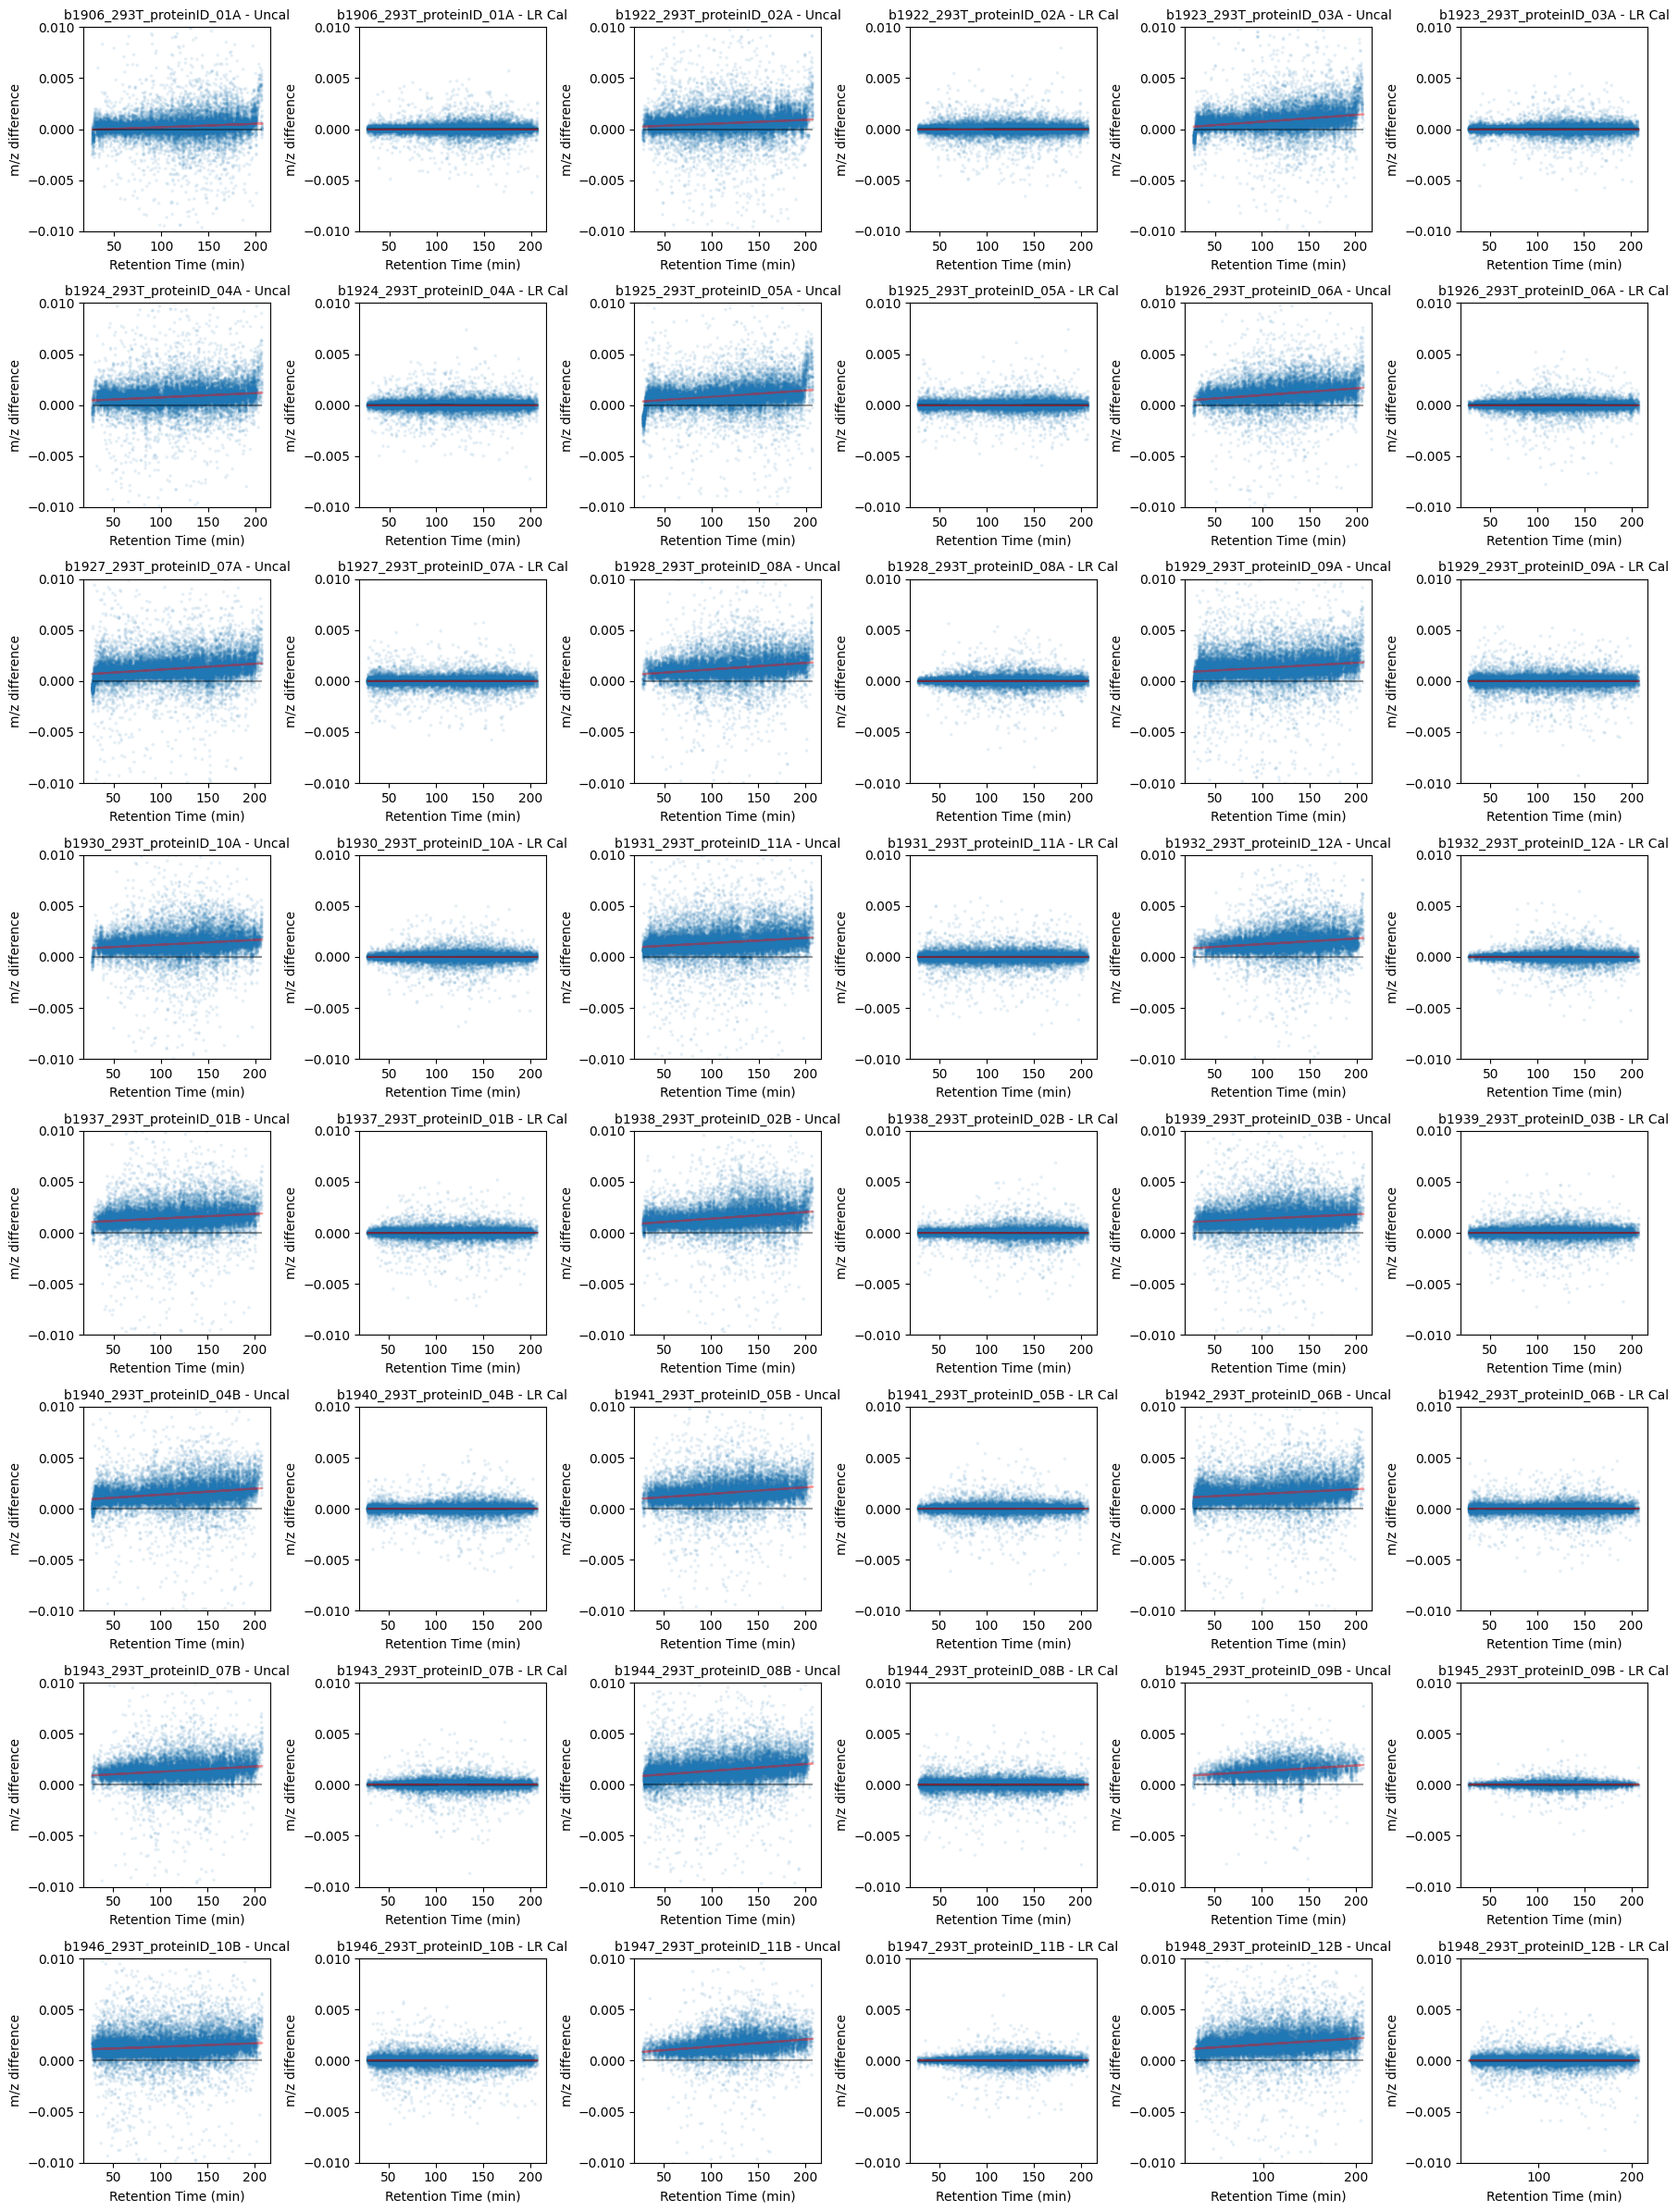

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get unique filenames and sort alphabetically
unique_filenames = np.sort(df_uncal_results_q['filename'].unique())

# Calculate number of rows and columns for subplots
num_plots = len(unique_filenames) * 2  # 2 subplots per filename
num_cols = 6
num_rows = int(np.ceil(num_plots / num_cols))

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 24))

# Flatten axis array for easy indexing
axs = axs.flatten()

# Loop through unique filenames and plot
for i, filename in enumerate(unique_filenames):
    # Filter dataframe for the current filename
    df_subset = df_uncal_results_q[df_uncal_results_q['filename'] == filename]
    
    # Extract the part of the filename before "_QE3..."
    title = filename.split('_QE3')[0]
    
    # First subplot (Uncalibrated)
    axs[i*2].scatter(df_subset['RT'], df_subset['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3)
    x = df_subset['RT']
    y = df_subset['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*2].plot(x, polynomial(x), color='red', alpha=0.4)
    x_range = df_subset['RT']
    axs[i*2].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)
    axs[i*2].set_ylim(-0.01, 0.01)
    axs[i*2].set_xlabel('Retention Time (min)')
    axs[i*2].set_ylabel('m/z difference')
    axs[i*2].set_title(f'{title} - Uncal', size = 10)

    # Second subplot (LR Calibrated)
    axs[i*2+1].scatter(df_subset['RT'], df_subset['RF adj deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3)
    x = df_subset['RT']
    y = df_subset['RF adj deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*2+1].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*2+1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*2+1].set_ylim(-0.01, 0.01)
    axs[i*2+1].set_xlabel('Retention Time (min)')
    axs[i*2+1].set_ylabel('m/z difference')
    axs[i*2+1].set_title(f'{title} - LR Cal', size = 10)

# Hide any unused subplots
for i in range(num_plots, num_cols*num_rows):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [35]:
import warnings
import numpy as np
from psims.transform.mzml import MzMLTransformer

# Suppress UserWarning about feature names
warnings.filterwarnings("ignore", category=UserWarning)

def get_x(spectrum):
    mz_values = spectrum['m/z array']
    retention_time = float(spectrum['scanList']['scan'][0]['scan start time'])
    total_ion_count = float(spectrum['total ion current'])
    injection_time = float(spectrum['scanList']['scan'][0]['ion injection time'])
    x = [[mz_value, retention_time, total_ion_count, injection_time] for mz_value in mz_values]
    return x

def RFcal(spectrum, rf_model):
    mz_values = spectrum['m/z array']
    x = get_x(spectrum)
    retention_time = float(spectrum['scanList']['scan'][0]['scan start time'])
    total_ion_count = float(spectrum['total ion current'])
    injection_time = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    # Apply the calibration function to the m/z values
    calibrated_mz_values = np.array(mz_values) - np.array(rf_model.predict(x))
    
    # Replace the original m/z values with the calibrated ones
    spectrum['m/z array'] = calibrated_mz_values   
    
    # If there are selected ions, calibrate their m/z values as well
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
            and spectrum['precursorList']['precursor'] \
            and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
            and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:
        
        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['selected ion m/z'])
                
                # Create features for prediction for the selected ion
                x_selected_ion = np.array([[selected_ion_mz, retention_time, total_ion_count, injection_time]])
                
                # Calibrate the selected ion m/z value
                calibrated_selected_ion_mz = str(selected_ion_mz - rf_model.predict(x_selected_ion))[1:-1]
                selected_ion['selected ion m/z'] = calibrated_selected_ion_mz
    
    return spectrum

In [36]:
import os
from psims.transform.mzml import MzMLTransformer

for filename in unique_filenames:
    
    rf_model = trained_models[filename]
    
    input_file = os.path.join("results", "TRFP", "PXD001468", f"{filename}")
    output_file = os.path.join("results", "TRFP", "PXD001468", f"{filename}_RFcal.mzML")
    
    # Apply the RF calibration to the mzML file
    with open(input_file, 'rb') as in_stream, open(output_file, 'wb') as out_stream:
        MzMLTransformer(in_stream, out_stream, lambda spectrum: RFcal(spectrum, rf_model)).write()

Handled 0 spectra
Handled 1000 spectra
Handled 2000 spectra
Handled 3000 spectra
Handled 4000 spectra
Handled 5000 spectra
Handled 6000 spectra
Handled 7000 spectra
Handled 8000 spectra


KeyboardInterrupt: 